**Statistical Distribution of India_VIX**

In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from nsepy import get_history
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats

## 1. How Are Stock Returns Distributed?
Many models and theories surrounding stocks assume a normal distribution. We will try to determine that here with a data-based analysis. Properties of a Gaussian distribution are as follows:

* Mean, median, and mode are all the same
* The data is symmetrical, meaning there are equal counts of observations on both sides of the mean.
* In normally distributed data, 68.25% of all cases fall within +/- one standard deviation from the mean, 95% of all cases fall within +/- two standard deviations from the mean, and 99.7% of all cases fall within +/- three standard deviations from the mean.

Let's start by pulling 20 years of daily price data for the **IndiaVIX**. We'll use similar methods we've used in the last few lessons to pull this data and will calculate the log returns here.

One quick way of doing this is to determine how many data points we have on either side of the mean here. We have a bit more than 5,000 data points. The below code takes the count of data points greater than the mean and divides it by the total number of data points. This will give us the percentage of data points greater than the mean.

In [2]:
start = datetime.date.today() - datetime.timedelta(365*20)
end = datetime.date.today()
India_VIX = get_history(symbol="INDIAVIX",start = start , end = end ,index = True)["Close"]
India_VIX


Date
                  NaN
2009-03-02    43.1700
2009-03-03    43.8900
2009-03-04    42.5200
2009-03-05    41.4900
               ...   
2022-12-15    13.7325
2022-12-16    14.0700
2022-12-19    13.5525
2022-12-20    13.7800
2022-12-21    15.5625
Name: Close, Length: 3460, dtype: float64

In [3]:
df = pd.DataFrame(India_VIX,columns=["Close"])
df

,Close
Date,
,NaN
2009-03-02,43.1700
2009-03-03,43.8900
2009-03-04,42.5200
2009-03-05,41.4900
...,...
2022-12-15,13.7325
2022-12-16,14.0700
2022-12-19,13.5525


In [4]:
type(India_VIX)

pandas.core.series.Series

<AxesSubplot:xlabel='Date'>

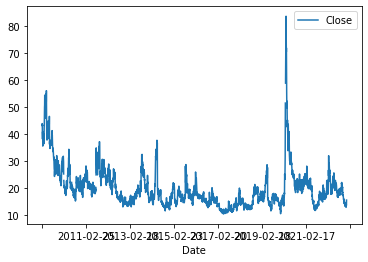

In [5]:
df.plot()

In [6]:
df.max()

Close    83.6075
dtype: float64

In [29]:
df["Log_Price"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))
df.dropna()

,Close,Log Price,vols,Date,Log_Price
Date,,,,,
2009-05-21,43.3100,-0.133791,6.390395,2009-05-21,-0.133791
2009-05-22,41.9700,-0.031428,6.403770,2009-05-22,-0.031428
2009-05-25,39.3800,-0.063697,6.444796,2009-05-25,-0.063697
2009-05-26,43.8700,0.107973,6.426869,2009-05-26,0.107973
2009-05-27,39.7400,-0.098872,6.395964,2009-05-27,-0.098872
...,...,...,...,...,...
2022-12-15,13.7325,0.063701,2.423723,2022-12-15,0.063701
2022-12-16,14.0700,0.024280,2.363679,2022-12-16,0.024280
2022-12-19,13.5525,-0.037474,2.241017,2022-12-19,-0.037474


In [30]:
(len(df[df["Close"] > df["Close"].mean()])) / (len(df))

0.39867549668874175

**Volatility Constant**

In [31]:
df["vols"] = pd.DataFrame(df["Close"].rolling(50).std())


In [32]:
plt.figure(figsize=(12,5))


<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

In [33]:
from datetime import datetime as dt

In [34]:
df["Date"] = df.index
type(df["Date"])

pandas.core.series.Series

In [35]:
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d")
df = df.dropna()
df

,Close,Log Price,vols,Date,Log_Price
Date,,,,,
2009-10-08,29.9000,-0.020851,5.940123,2009-10-08,-0.020851
2009-10-09,30.2400,0.011307,5.540657,2009-10-09,0.011307
2009-10-12,28.1000,-0.073396,5.427127,2009-10-12,-0.073396
2009-10-14,26.3700,-0.063543,5.381247,2009-10-14,-0.063543
2009-10-15,26.6400,0.010187,5.385970,2009-10-15,0.010187
...,...,...,...,...,...
2022-12-15,13.7325,0.063701,2.156429,2022-12-15,0.063701
2022-12-16,14.0700,0.024280,2.206076,2022-12-16,0.024280
2022-12-19,13.5525,-0.037474,2.269627,2022-12-19,-0.037474


<AxesSubplot:xlabel='Date', ylabel='Close'>

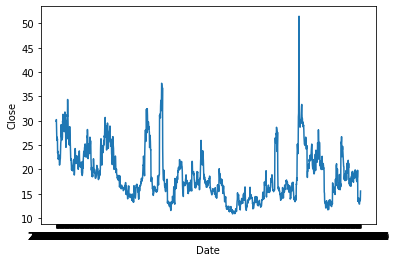

In [86]:
sns.lineplot(x=df["Date"],y=df["Close"],data = df)

array([[<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Log Price'}>],
       [<AxesSubplot:title={'center':'vols'}>,
        <AxesSubplot:title={'center':'Log_Price'}>]], dtype=object)

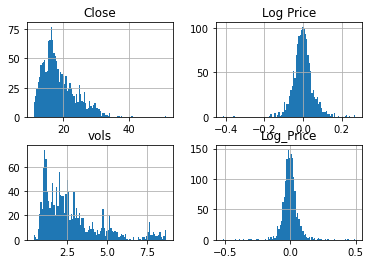

In [37]:
df.hist(bins=100)

H0 : Data fits normal Distribution


H1 : Data does not fits normal Distribution

In [38]:
df

,Close,Log Price,vols,Date,Log_Price
Date,,,,,
2009-10-08,29.9000,-0.020851,5.940123,2009-10-08,-0.020851
2009-10-09,30.2400,0.011307,5.540657,2009-10-09,0.011307
2009-10-12,28.1000,-0.073396,5.427127,2009-10-12,-0.073396
2009-10-14,26.3700,-0.063543,5.381247,2009-10-14,-0.063543
2009-10-15,26.6400,0.010187,5.385970,2009-10-15,0.010187
...,...,...,...,...,...
2022-12-15,13.7325,0.063701,2.156429,2022-12-15,0.063701
2022-12-16,14.0700,0.024280,2.206076,2022-12-16,0.024280
2022-12-19,13.5525,-0.037474,2.269627,2022-12-19,-0.037474


**Conduction a normality test**

In [44]:
alpha = 0.05

In [47]:
test_statistic,p_value = stats.normaltest((np.array(df.Close)))
print(test_statistic)
print(p_value)
if p_value>alpha:
    print("We do not reject H0")
else:
    print("We reject H0")

223.84225108830688
2.4732770509082604e-49
We reject H0


**As P_value is less than alpha we reject H0 which means that data is not normally distributed.**

**Testing Skewness and Kurtosis**


**As one added testing step, we can test the skewness and kurtosis of our distribution using the Jarque-Bera test. The test statistic will always be greater than zero. The further the test statistic is from zero, the more likely the sample data does not match a normal distribution.**

**Lucky for us, Python has another library for us to use here which really simplifies the analysis. From the `scipy.stats` library, we can use the `jarque_bera` method directly to our data to get test statistic** 


In [59]:
stats.jarque_bera((np.array(df.Close))) # check for normality and pvalue is less than significance level(0.05) data is not normally distributed

Jarque_beraResult(statistic=359.8734272357548, pvalue=0.0)

In [60]:
from scipy.stats import kurtosis
from scipy.stats import skew

In [61]:
kurtosis(np.array(df.Close))+3

4.323172175217153

In [62]:
skew(np.array(df.Close)) # if skew is greater than 0 data is not normal and skewed

1.0199134608979255

### 2.3 Where Does Our Gaussian Distribution Break Down?
So according to the normality test, our data is not normally distributed despite the histogram looking like it may be. So, why is the data failing the normality test? The answer likely comes down to fat tails. Fat tails essentially means that extreme events +/-3 standard deviations away from the mean) are more likely than the normal distribution would imply.

Assuming a normal distribution with a mean of 0.00028 and standard deviation of 0.012, we can determine the probability of any return given that the returns fit a normal distribution.

To determine how many standard deviations away from the mean a specific number is, we need to use 

$\tfrac{X - \bar{X}}{\textrm{Sample standard deviation}}$

 Let's do this for the min and max of the sample data:

In [67]:
dfMax = df.Log_Price.max()
dfMin = df.Log_Price.min()
print(f"Max Value is {dfMax} and Min Value is {dfMin}")

Max Value is 0.4969762018552344 and Min Value is -0.5154016224042972


In [68]:
(df.Log_Price.min() - df.Log_Price.mean()) / df.Log_Price.std()

-8.136716113448985

In [69]:
(df.Log_Price.max() - df.Log_Price.mean()) / df.Log_Price.std()

7.860146731774398

In [70]:
#The probability of -8 std occuring is

stats.norm.cdf(-8.13)

2.1464521713883206e-16

#**t-distribution**

In [83]:
#len(df)

**There are 1461 data points we have 1460(n-1) degree of freedom.**

In [85]:
#t_stat,p = stats.ttest_ind(df["Close"],stats.t.rvs(df=1460,size=1460))
#print(f"t={t_stat}, p={p}")